In [23]:
# ===============================
# Librairies
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA

import tensorflow as tf
from keras import layers, models, callbacks, optimizers, losses, metrics

In [ ]:
# ===============================
# Load a real time series
# ===============================
def load_data_from_csv(filepath):
    # Load CSV without header
    df = pd.read_csv(filepath, header=None)
    # Combine first two rows into a single header
    header1 = df.iloc[0].fillna("")  # market symbols
    header2 = df.iloc[1].fillna("")  # OHLCV etc
    # Create new column names
    new_header = []
    for h1, h2 in zip(header1, header2):
        if h1 != "":
            new_header.append(f"{h1}_{h2}" if h2 != "" else h1)
        else:
            new_header.append(h2)
    # Drop first two rows from the data
    df = df[2:]
    df.columns = new_header
    df = df.reset_index(drop=True)
    # Optional: remove fully empty columns
    df = df.dropna(axis=1, how='all')
    return df

df_load = load_data_from_csv("../data/Stock_Market_Initial_Data.csv")
df_load

/var/folders/8j/y46wyjvx641clg_t_cq0ggfc0000gn/T/ipykernel_18941/2770967110.py:6: DtypeWarning: Columns (1,2,3,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,36,37,38,39,40,41,43,44,45,46,47,48,50,51,52,53,54,55,57,58,59,60,61,62,64,65,66,67,68,69,71,72,73,74,75,76,78,79,80,81,82,83,85,86,87,88,89,90,92,93,94,95,96,97,99,100,101,102,103,104,106,107,108,109,110,111,113,114,115,116,117,118,120,121,122,123,124,125,127,128,129,130,131,132,134,135,136,137,138,139,141,142,143,144,145,146,148,149,150,151,152,153,155,156,157,158,159,160,162,163,164,165,166,167,169,170,171,172,173,174,176,177,178,179,180,181,183,184,185,186,187,188,190,191,192,193,194,195,197,198,199,200,201,202,204,205,206,207,208,209,211,212,213,214,215,216,218,219,220,221,222,223,225,226,227,228,229,230) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, header=None)


,Date,^GSPC_High,Low,Open,Close,Volume,Adj Close,^IXIC_High,Low,Open,...,Open,Close,Volume,Adj Close,^JN0U.JO_High,Low,Open,Close,Volume,Adj Close
0,12/31/1996,753.9500122,740.7399902,753.8499756,740.7399902,399760000,740.7399902,1291.880005,1285.449951,1289.23999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/2/1997,742.8099976,729.5499878,740.7399902,737.0100098,463230000,737.0100098,1293.630005,1272.339966,1292.650024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/3/1997,748.2399902,737.0100098,737.0100098,748.0300293,452970000,748.0300293,1310.839966,1280.699951,1288.02002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/6/1997,753.3099976,743.8200073,748.0300293,747.6500244,531350000,747.6500244,1321.469971,1310.630005,1314.339966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/7/1997,753.2600098,742.1799927,747.6500244,753.2299805,538220000,753.2299805,1327.819946,1312.079956,1316.910034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6504,11/2/2022,3894.439941,3758.679932,3852.899902,3759.689941,4899000000,3759.689941,10993.24023,10522.90039,10885.00977,...,NaN,NaN,NaN,NaN,3640.830078,3566.639893,3602.090088,3573.790039,0.0,3573.790039
6505,11/3/2022,3750.590088,3698.149902,3733.25,3719.889893,4625290000,3719.889893,10486.00977,10319.54004,10399.4502,...,NaN,NaN,NaN,NaN,3557.22998,3431.080078,3557.0,3474.129883,0.0,3474.129883
6506,11/4/2022,3796.340088,3708.840088,3766.97998,3770.550049,0,3770.550049,10553.62988,10262.92969,10548.13965,...,NaN,NaN,NaN,NaN,3765.290039,3497.070068,3498.77002,3751.629883,0.0,3751.629883
6507,11/7/2022,3813.949951,3764.699951,3780.709961,3806.800049,4341620000,3806.800049,10587.95996,10428.91016,10516.94043,...,NaN,NaN,NaN,NaN,3826.070068,3695.27002,3749.379883,3815.75,0.0,3815.75


In [25]:
# ===============================
# Function to extract market data for a specific index from the CSV file
# ===============================
def extract_market_data(df, market_name):
    """
    Extract Date + OHLCV columns for a given market
    """
    df.columns = df.columns.str.strip()
    high_col_candidates = [c for c in df.columns if c.startswith(f"{market_name}_High")]
    if not high_col_candidates:
        raise ValueError(f"Column starting with {market_name}_High not found.")
    
    high_col = high_col_candidates[0]
    high_idx = df.columns.get_loc(high_col)
    
    # Date + next 6 columns (High, Low, Open, Close, Volume, Adj Close)
    cols_idx = [0] + list(range(high_idx, high_idx + 6))
    df_market = df.iloc[:, cols_idx].copy()
    df_market = df_market.reset_index(drop=True)
    
    # Rename columns for clarity
    df_market.columns = ["Date", "High", "Low", "Open", "Close", "Volume", "Adj Close"]
    df_market[["High", "Low", "Open", "Close", "Volume", "Adj Close"]] = df_market[["High", "Low", "Open", "Close", "Volume", "Adj Close"]].astype(float)
    return df_market

# Example for ^GSPC
df_gspc = extract_market_data(df_load, "^GSPC")
df_gspc

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/31/1996,753.950012,740.739990,753.849976,740.739990,3.997600e+08,740.739990
1,1/2/1997,742.809998,729.549988,740.739990,737.010010,4.632300e+08,737.010010
2,1/3/1997,748.239990,737.010010,737.010010,748.030029,4.529700e+08,748.030029
3,1/6/1997,753.309998,743.820007,748.030029,747.650024,5.313500e+08,747.650024
4,1/7/1997,753.260010,742.179993,747.650024,753.229981,5.382200e+08,753.229981
...,...,...,...,...,...,...,...
6504,11/2/2022,3894.439941,3758.679932,3852.899902,3759.689941,4.899000e+09,3759.689941
6505,11/3/2022,3750.590088,3698.149902,3733.250000,3719.889893,4.625290e+09,3719.889893
6506,11/4/2022,3796.340088,3708.840088,3766.979980,3770.550049,0.000000e+00,3770.550049
6507,11/7/2022,3813.949951,3764.699951,3780.709961,3806.800049,4.341620e+09,3806.800049


In [26]:
# ===============================
# Preprocess the data to add additional informations
# ===============================
def preprocess_data(df):
    """
    Full preprocessing for OHLCV financial data
    Adds trend, momentum, volatility, OHLC-based, volume, and temporal features
    """

    # 1. Temporal features (not useful for stock market datas)
    # dates = pd.to_datetime(df['Date'])
    # df['DayOfYear'] = dates.dt.dayofyear
    # df['Month'] = dates.dt.month
    # df['Sin_Day'] = np.sin(2 * np.pi * df['DayOfYear'] / 365)
    # df['Cos_Day'] = np.cos(2 * np.pi * df['DayOfYear'] / 365)
    # df['Sin_Month'] = np.sin(2 * np.pi * df['Month'] / 12)
    # df['Cos_Month'] = np.cos(2 * np.pi * df['Month'] / 12)

    # 2. Price-based indicators
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

    # Momentum / Returns
    df['Daily_Return'] = df['Close'].pct_change()
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Momentum_4'] = df['Close'] - df['Close'].shift(4)
    df['Momentum_10'] = df['Close'] - df['Close'].shift(10)

    # Relative Strength / Momentum indicators
    delta = df['Close'].diff(1)
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
    rs = gain / loss
    df['RSI_14'] = 100 - (100 / (1 + rs))

    low14 = df['Close'].rolling(14).min()
    high14 = df['Close'].rolling(14).max()
    df['Stochastic_K'] = 100 * (df['Close'] - low14) / (high14 - low14)
    df['Stochastic_D'] = df['Stochastic_K'].rolling(3).mean()

    # Volatility indicators
    df['Volatility_10'] = df['Close'].rolling(10).std()
    df['Volatility_20'] = df['Close'].rolling(20).std()
    df['ATR_14'] = df['High'].combine(df['Close'].shift(1), max) - df['Low'].combine(df['Close'].shift(1), min)
    df['ATR_14'] = df['ATR_14'].rolling(14).mean()
    df['Price_Range'] = df['High'] - df['Low']

    # MACD
    exp12 = df['Close'].ewm(span=12, adjust=False).mean()
    exp26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp12 - exp26
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    # Bollinger Bands
    df['Middle_Band'] = df['Close'].rolling(20).mean()
    df['Upper_Band'] = df['Middle_Band'] + (df['Close'].rolling(20).std() * 2)
    df['Lower_Band'] = df['Middle_Band'] - (df['Close'].rolling(20).std() * 2)
    df['BB_%B'] = (df['Close'] - df['Lower_Band']) / (df['Upper_Band'] - df['Lower_Band'])
    
    # OHLC-based features
    df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['Candle_Body'] = df['Close'] - df['Open']
    df['Upper_Shadow'] = df['High'] - df[['Close', 'Open']].max(axis=1)
    df['Lower_Shadow'] = df[['Close', 'Open']].min(axis=1) - df['Low']
    df['Gap'] = df['Open'] - df['Close'].shift(1)
    df['HL_Ratio'] = df['High'] / df['Low']
    df['CO_Ratio'] = df['Close'] / df['Open']
    
    # Volume-based features
    df['Volume_SMA_20'] = df['Volume'].rolling(20).mean()
    df['Volume_SMA_50'] = df['Volume'].rolling(50).mean()
    df['Volume_Change'] = df['Volume'].pct_change() # clip?? 
    # Volume indicators
    obv = [0]
    for i in range(1, len(df)):
        if df['Close'][i] > df['Close'][i-1]:
            obv.append(obv[-1] + df['Volume'][i])
        elif df['Close'][i] < df['Close'][i-1]:
            obv.append(obv[-1] - df['Volume'][i])
        else:
            obv.append(obv[-1])
    df['OBV'] = obv
    df['VWAP'] = (df['Close'] * df['Volume']).cumsum() / df['Volume'].cumsum()
    
    # Drop NaNs created by rolling/shift
    df.dropna(inplace=True)
    
    return df

df = preprocess_data(df_gspc)
df

,Date,High,Low,Open,Close,Volume,Adj Close,SMA_50,SMA_200,EMA_20,...,Upper_Shadow,Lower_Shadow,Gap,HL_Ratio,CO_Ratio,Volume_SMA_20,Volume_SMA_50,Volume_Change,OBV,VWAP
199,10/14/1997,972.859985,961.869995,968.099976,970.280029,5.103300e+08,970.280029,938.981000,852.581201,958.358095,...,2.579956,6.229981,0.000000,1.011426,1.002252,5.385835e+08,5.250898e+08,0.438360,1.575112e+10,854.688855
200,10/15/1997,970.280029,962.750000,970.280029,965.719971,5.053100e+08,965.719971,939.247999,853.706101,959.059226,...,0.000000,2.969971,0.000000,1.007821,0.995300,5.343215e+08,5.246818e+08,-0.009837,1.524581e+10,855.233674
201,10/16/1997,973.380005,950.770019,965.719971,955.250000,5.970100e+08,955.250000,939.146599,854.797301,958.696443,...,7.660034,4.479981,0.000000,1.023781,0.989158,5.358305e+08,5.253180e+08,0.181473,1.464880e+10,855.810164
202,10/17/1997,955.229981,931.580017,955.229981,944.159973,6.249800e+08,944.159973,939.005999,855.777951,957.312017,...,0.000000,12.579956,-0.020019,1.025387,0.988411,5.355275e+08,5.262970e+08,0.046850,1.402382e+10,856.340069
203,10/20/1997,955.719971,941.429993,944.159973,955.609985,4.838800e+08,955.609985,939.447399,856.817751,957.149919,...,0.109985,2.729980,0.000000,1.015179,1.012127,5.351765e+08,5.247062e+08,-0.225767,1.450770e+10,856.798918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6504,11/2/2022,3894.439941,3758.679932,3852.899902,3759.689941,4.899000e+09,3759.689941,3821.862212,4101.216359,3777.747117,...,41.540039,1.010009,-3.200196,1.036119,0.975808,4.547876e+09,4.373521e+09,0.093232,1.262466e+12,1949.600567
6505,11/3/2022,3750.590088,3698.149902,3733.250000,3719.889893,4.625290e+09,3719.889893,3813.444609,4097.152009,3772.236905,...,17.340088,21.739991,-26.439941,1.014180,0.996421,4.566536e+09,4.404889e+09,-0.055871,1.257841e+12,1950.028891
6506,11/4/2022,3796.340088,3708.840088,3766.979980,3770.550049,0.000000e+00,3770.550049,3804.873208,4093.591110,3772.076252,...,25.790039,58.139892,47.090087,1.023592,1.000948,4.344053e+09,4.345368e+09,-1.000000,1.257841e+12,1950.028891
6507,11/7/2022,3813.949951,3764.699951,3780.709961,3806.800049,4.341620e+09,3806.800049,3799.856011,4090.635410,3775.383280,...,7.149902,16.010010,10.159912,1.013082,1.006901,4.369418e+09,4.368695e+09,inf,1.262182e+12,1950.450491


In [27]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'SMA_50',
       'SMA_200', 'EMA_20', 'EMA_50', 'Daily_Return', 'Log_Return',
       'Momentum_4', 'Momentum_10', 'RSI_14', 'Stochastic_K', 'Stochastic_D',
       'Volatility_10', 'Volatility_20', 'ATR_14', 'Price_Range', 'MACD',
       'MACD_Signal', 'Middle_Band', 'Upper_Band', 'Lower_Band', 'BB_%B',
       'Typical_Price', 'Candle_Body', 'Upper_Shadow', 'Lower_Shadow', 'Gap',
       'HL_Ratio', 'CO_Ratio', 'Volume_SMA_20', 'Volume_SMA_50',
       'Volume_Change', 'OBV', 'VWAP'],
      dtype='object')

In [28]:
# ===============================
# Plotting different figures (optional)
# ===============================
"""
# Example: price and moving averages
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50', color='orange')
plt.plot(df['Date'], df['SMA_200'], label='SMA 200', color='green')
plt.plot(df['Date'], df['EMA_20'], label='EMA 20', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price & Moving Averages')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Daily Returns & Log Returns
plt.figure(figsize=(16, 4))
plt.plot(df['Date'], df['Daily_Return'], label='Daily Return', color='purple')
plt.plot(df['Date'], df['Log_Return'], label='Log Return', color='brown')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Daily and Log Returns')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# RSI & Momentum
plt.figure(figsize=(16, 4))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14', color='blue')
plt.plot(df['Date'], df['Momentum_4'], label='Momentum 4', color='orange')
plt.plot(df['Date'], df['Momentum_10'], label='Momentum 10', color='green')
plt.xlabel('Date')
plt.ylabel('Indicator Value')
plt.title('RSI & Momentum Indicators')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bollinger Bands
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.plot(df['Date'], df['Middle_Band'], label='Middle Band', color='orange')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band', color='green')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band', color='red')
plt.fill_between(df['Date'], df['Lower_Band'], df['Upper_Band'], color='gray', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Volume & OBV
plt.figure(figsize=(16, 4))
plt.plot(df['Date'], df['Volume'], label='Volume', color='blue', alpha=0.5)
plt.plot(df['Date'], df['OBV'], label='On-Balance Volume (OBV)', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume & OBV')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
"""

"\n# Example: price and moving averages\nplt.figure(figsize=(16, 6))\nplt.plot(df['Date'], df['Close'], label='Close', color='blue')\nplt.plot(df['Date'], df['SMA_50'], label='SMA 50', color='orange')\nplt.plot(df['Date'], df['SMA_200'], label='SMA 200', color='green')\nplt.plot(df['Date'], df['EMA_20'], label='EMA 20', color='red', linestyle='--')\nplt.xlabel('Date')\nplt.ylabel('Price')\nplt.title('Close Price & Moving Averages')\nplt.legend()\nplt.grid(True)\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n\n# Daily Returns & Log Returns\nplt.figure(figsize=(16, 4))\nplt.plot(df['Date'], df['Daily_Return'], label='Daily Return', color='purple')\nplt.plot(df['Date'], df['Log_Return'], label='Log Return', color='brown')\nplt.xlabel('Date')\nplt.ylabel('Returns')\nplt.title('Daily and Log Returns')\nplt.legend()\nplt.grid(True)\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n\n# RSI & Momentum\nplt.figure(figsize=(16, 4))\nplt.plot(df['Date'], df['RSI_14'], label='RS

In [29]:
# ===============================
# Drop unused columns and verify data consistency
# ===============================
df_ml = df.copy()

df_ml = df_ml.drop(columns=["Date", "Adj Close"], errors="ignore")   # Remove non-numeric column
df_ml = df_ml.select_dtypes(include=[np.number]).dropna()

In [30]:
df_ml.describe(include='all').T

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
High,6310.0,1.811320e+03,9.372993e+02,6.952700e+02,1.167902e+03,1.395890e+03,2.147167e+03,4.818620e+03
Low,6310.0,1.788631e+03,9.275350e+02,6.667900e+02,1.150972e+03,1.375375e+03,2.130922e+03,4.780040e+03
Open,6310.0,1.800414e+03,9.326635e+02,6.792800e+02,1.161058e+03,1.386485e+03,2.139150e+03,4.804510e+03
Close,6310.0,1.800652e+03,9.326594e+02,6.765300e+02,1.161088e+03,1.386920e+03,2.139175e+03,4.796560e+03
Volume,6310.0,3.014382e+09,1.597637e+09,0.000000e+00,1.493925e+09,3.203995e+09,3.953060e+09,1.145623e+10
SMA_50,6310.0,1.789730e+03,9.240970e+02,7.889568e+02,1.144509e+03,1.379014e+03,2.116683e+03,4.681012e+03
SMA_200,6310.0,1.752258e+03,8.908922e+02,8.525812e+02,1.143285e+03,1.365272e+03,2.065261e+03,4.496906e+03
EMA_20,6310.0,1.796404e+03,9.288327e+02,7.433727e+02,1.157973e+03,1.385080e+03,2.138140e+03,4.720631e+03
EMA_50,6310.0,1.789489e+03,9.228214e+02,7.928356e+02,1.143128e+03,1.377613e+03,2.122923e+03,4.663258e+03
Daily_Return,6310.0,2.955291e-04,1.249260e-02,-1.198406e-01,-5.042967e-03,6.078084e-04,6.094419e-03,1.158004e-01


In [31]:
df_ml.isna().sum()

High             0
Low              0
Open             0
Close            0
Volume           0
SMA_50           0
SMA_200          0
EMA_20           0
EMA_50           0
Daily_Return     0
Log_Return       0
Momentum_4       0
Momentum_10      0
RSI_14           0
Stochastic_K     0
Stochastic_D     0
Volatility_10    0
Volatility_20    0
ATR_14           0
Price_Range      0
MACD             0
MACD_Signal      0
Middle_Band      0
Upper_Band       0
Lower_Band       0
BB_%B            0
Typical_Price    0
Candle_Body      0
Upper_Shadow     0
Lower_Shadow     0
Gap              0
HL_Ratio         0
CO_Ratio         0
Volume_SMA_20    0
Volume_SMA_50    0
Volume_Change    0
OBV              0
VWAP             0
dtype: int64

In [32]:
df_ml = df_ml.replace([np.inf, -np.inf], np.nan)
df_ml = df_ml.dropna()

In [33]:
df_ml.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'SMA_50', 'SMA_200', 'EMA_20',
       'EMA_50', 'Daily_Return', 'Log_Return', 'Momentum_4', 'Momentum_10',
       'RSI_14', 'Stochastic_K', 'Stochastic_D', 'Volatility_10',
       'Volatility_20', 'ATR_14', 'Price_Range', 'MACD', 'MACD_Signal',
       'Middle_Band', 'Upper_Band', 'Lower_Band', 'BB_%B', 'Typical_Price',
       'Candle_Body', 'Upper_Shadow', 'Lower_Shadow', 'Gap', 'HL_Ratio',
       'CO_Ratio', 'Volume_SMA_20', 'Volume_SMA_50', 'Volume_Change', 'OBV',
       'VWAP'],
      dtype='object')

In [ ]:
# ===============================
# Scale price datas not to cause imbalance into the model
# ===============================
# 1. Volume columns
volume_cols = ["Volume", "Volume_SMA_20", "Volume_SMA_50", "Volume_Change", "OBV"]
volumes_scaler = RobustScaler()
df_ml[volume_cols] = volumes_scaler.fit_transform(df_ml[volume_cols])

# 2. Price columns
price_cols = [
    "High", "Low", "Open", # "Adj Close",
    "SMA_50", "SMA_200", "EMA_20", "EMA_50",
    "Middle_Band", "Upper_Band", "Lower_Band",
    "Typical_Price", "VWAP"
]
prices_scaler = RobustScaler()
df_ml[price_cols] = prices_scaler.fit_transform(df_ml[price_cols])

indicators_scalers = {}
indicators_cols = [
  'Daily_Return', 'Log_Return', 'Momentum_4', 'Momentum_10', 'RSI_14', 'Stochastic_K', 'Stochastic_D',
    'Volatility_10', 'Volatility_20', 'ATR_14', 'Price_Range', 
    'MACD', 'MACD_Signal', 'BB_%B',
    'Candle_Body', 'Upper_Shadow', 'Lower_Shadow', 'Gap',
    'HL_Ratio', 'CO_Ratio'
]
for col in indicators_cols:
    indicators_scalers[col] = RobustScaler()
    df_ml[col] = indicators_scalers[col].fit_transform(df_ml[[col]])

close_scaler = RobustScaler()
df_ml["Close"] = close_scaler.fit_transform(df_ml[["Close"]])

In [35]:
df_ml.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
High,6309.0,0.423923,0.956900,-0.715463,-0.232823,0.0,0.767177,3.495303
Low,6309.0,0.421974,0.947039,-0.723459,-0.228969,0.0,0.771031,3.477464
Open,6309.0,0.423282,0.954071,-0.723583,-0.230648,0.0,0.769352,3.497508
Close,6309.0,0.422702,0.953268,-0.726265,-0.230886,0.0,0.769114,3.486014
Volume,6309.0,-0.077075,0.649692,-1.302782,-0.695291,0.0,0.304709,3.355870
SMA_50,6309.0,0.422787,0.951509,-0.607650,-0.241496,0.0,0.758504,3.401045
SMA_200,6309.0,0.419391,0.965762,-0.555948,-0.240748,0.0,0.759252,3.396490
EMA_20,6309.0,0.419632,0.947960,-0.655065,-0.231905,0.0,0.768095,3.405236
EMA_50,6309.0,0.420602,0.942671,-0.597469,-0.239641,0.0,0.760359,3.357403
Daily_Return,6309.0,-0.028070,1.120990,-10.807652,-0.507728,0.0,0.492272,10.336219


In [36]:
# ===============================
# Prepare features and target variable for co
# ===============================
X = df_ml.drop(columns=["Close"], errors="ignore")  # Features
y = df_ml["Close"]

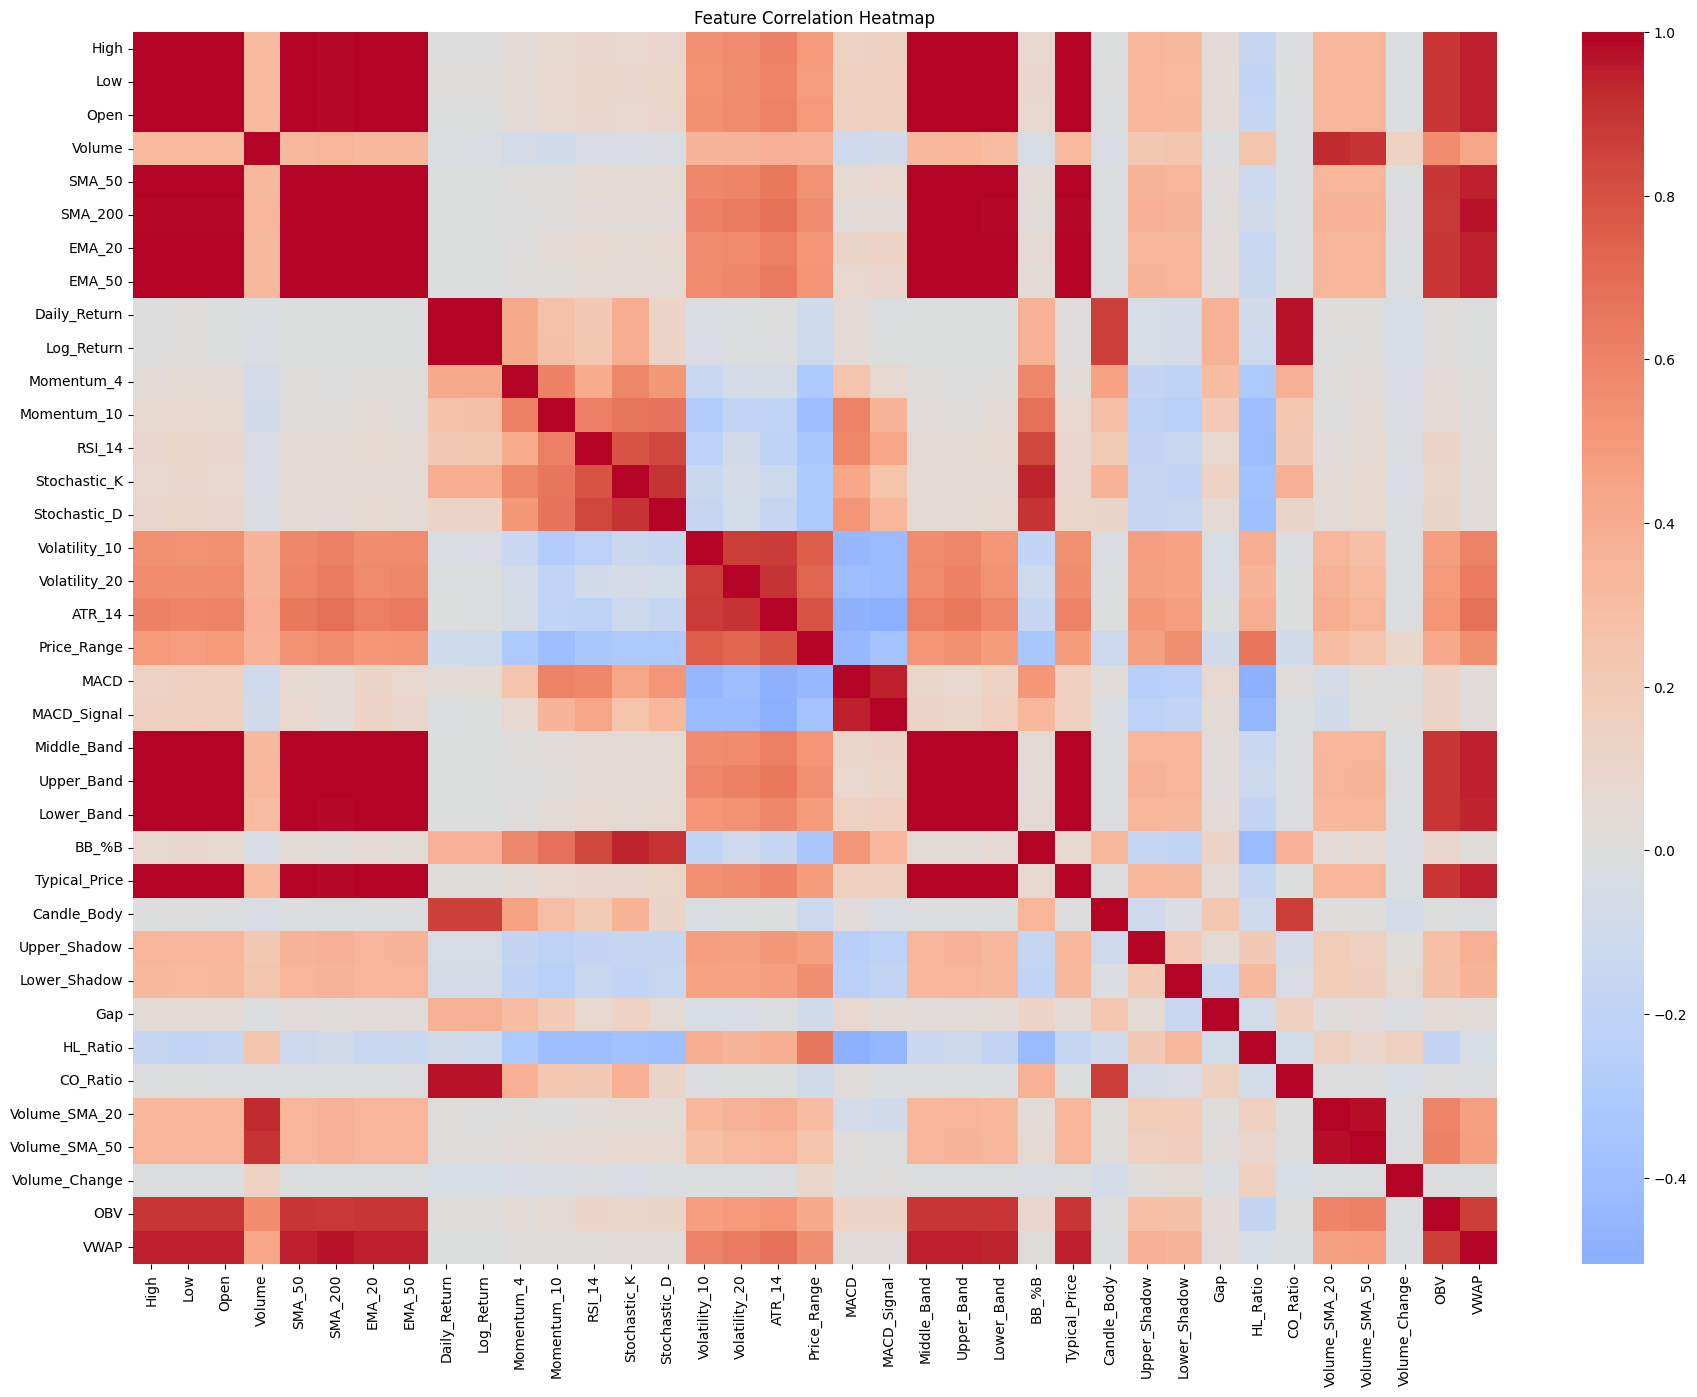

In [37]:
# ===============================
# Correlation Heatmap
# ===============================
plt.figure(figsize=(22, 16))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

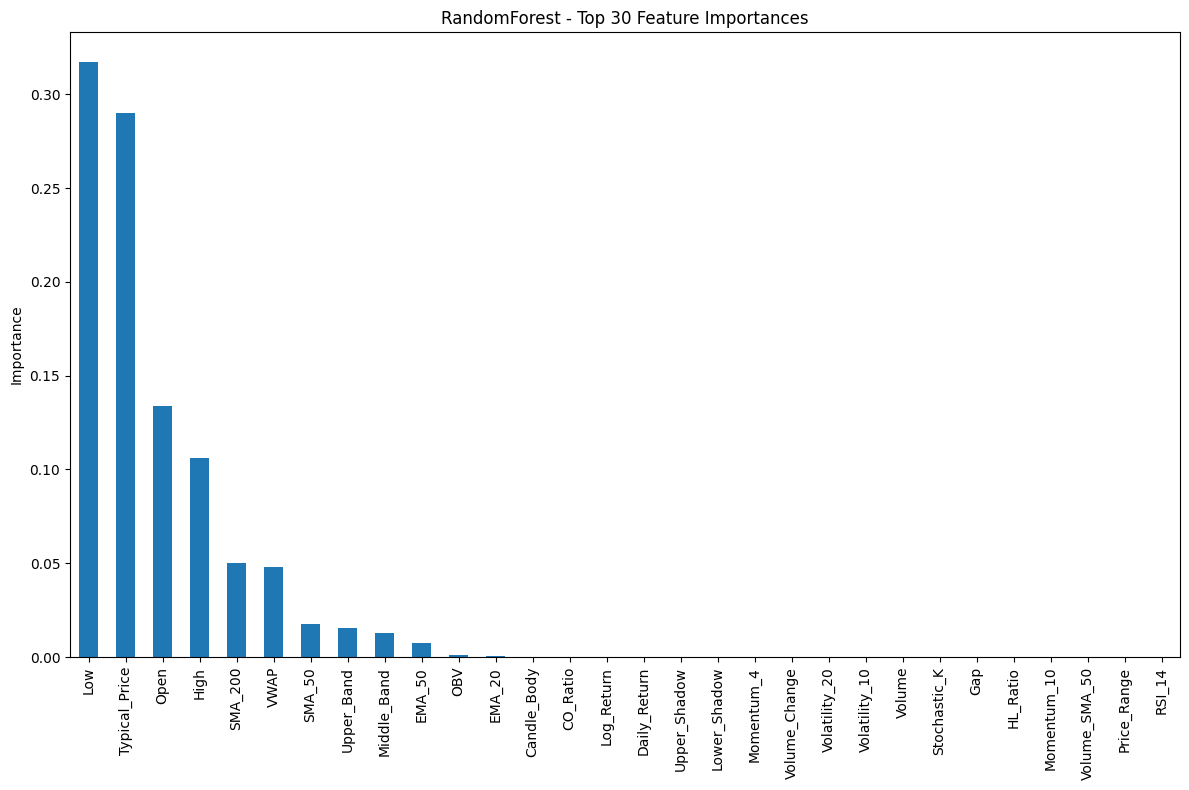

In [38]:
# ===============================
# Random Forest Feature Importances
# ===============================
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
importances.head(30).plot(kind="bar")
plt.title("RandomForest - Top 30 Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

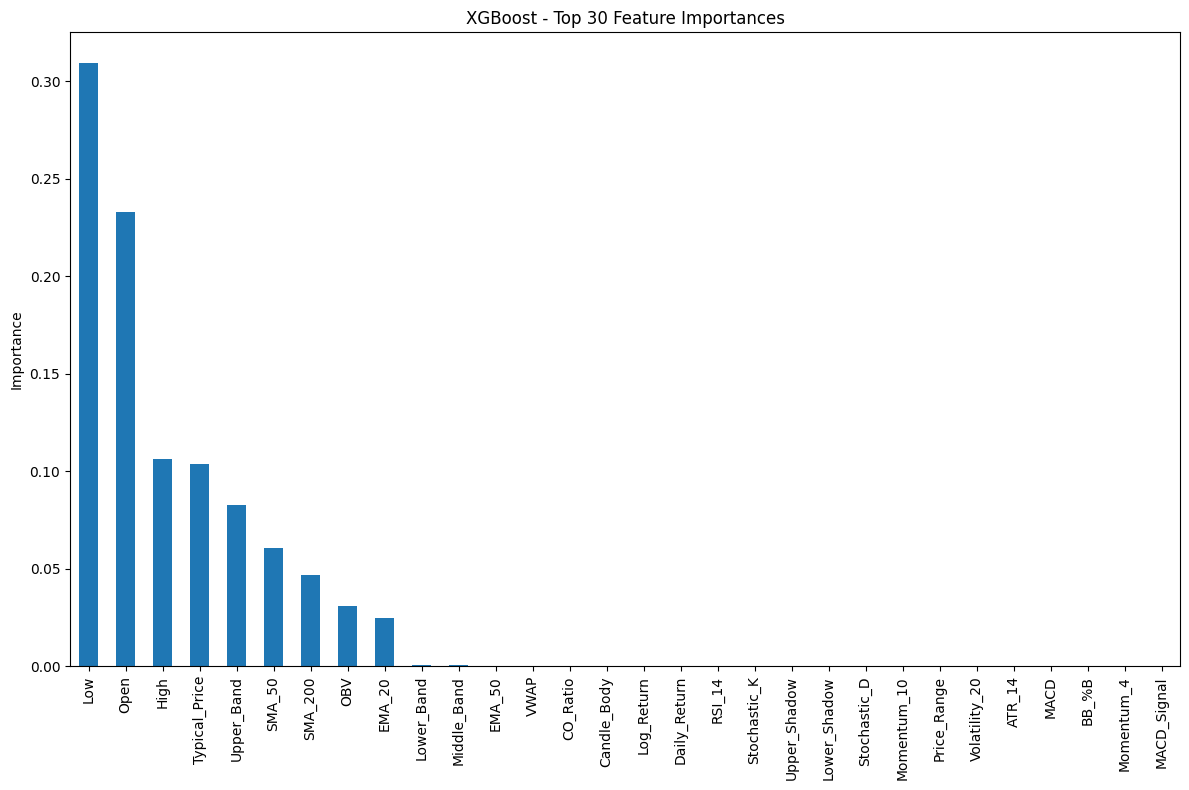

In [39]:
# ===============================
# XGBoost Feature Importances
# ===============================
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="reg:squarederror"
)

xgb.fit(X, y)

xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
xgb_importances.head(30).plot(kind="bar")
plt.title("XGBoost - Top 30 Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

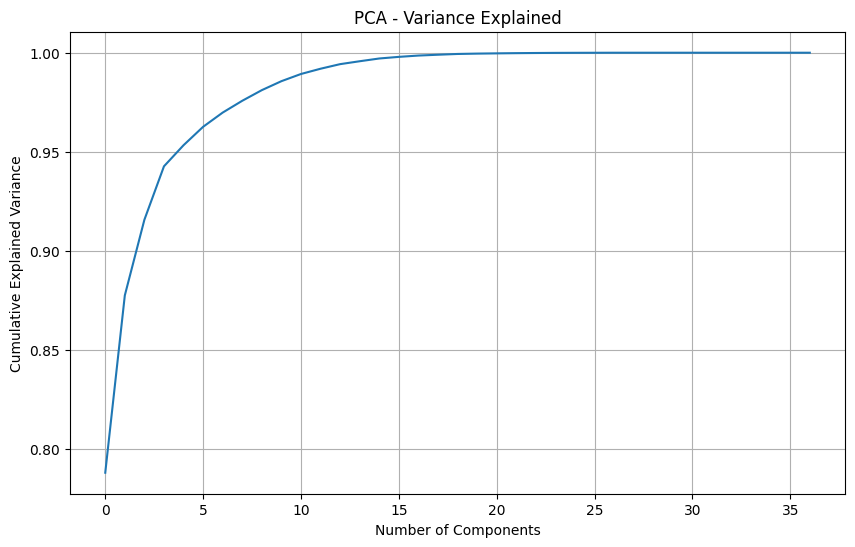

In [40]:
# ===============================
# PCA Variance Explained
# ===============================
pca = PCA()
pca.fit(X)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Variance Explained')
plt.grid(True)
plt.show()

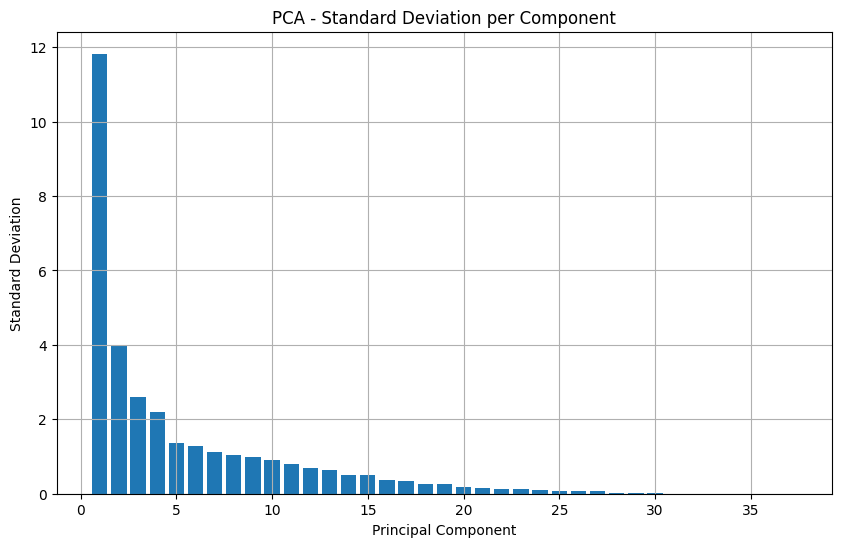

In [41]:
# ===============================
# PCA Variance Explained
# ===============================
explained_variance = pca.explained_variance_
std_dev = np.sqrt(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(std_dev) + 1), std_dev)
plt.xlabel('Principal Component')
plt.ylabel('Standard Deviation')
plt.title('PCA - Standard Deviation per Component')
plt.grid(True)
plt.show()

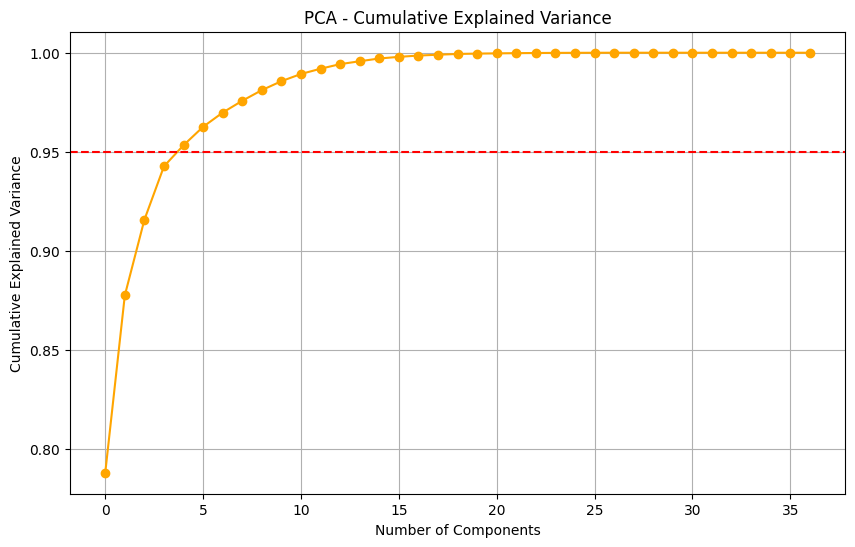

In [42]:
# ===============================
# PCA Variance Explained
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.axhline(y=0.95, color='r', linestyle='--')  # Draw a line at 95% variance
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

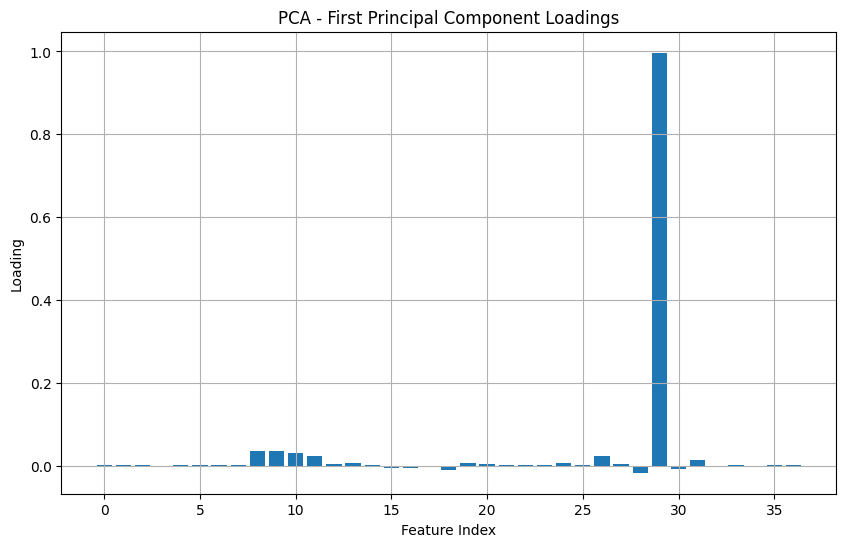

In [43]:
# ===============================
# PCA Principal components
# ===============================
components = pca.components_
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), components[0])
plt.xlabel('Feature Index')
plt.ylabel('Loading')
plt.title('PCA - First Principal Component Loadings')
plt.grid(True)
plt.show()

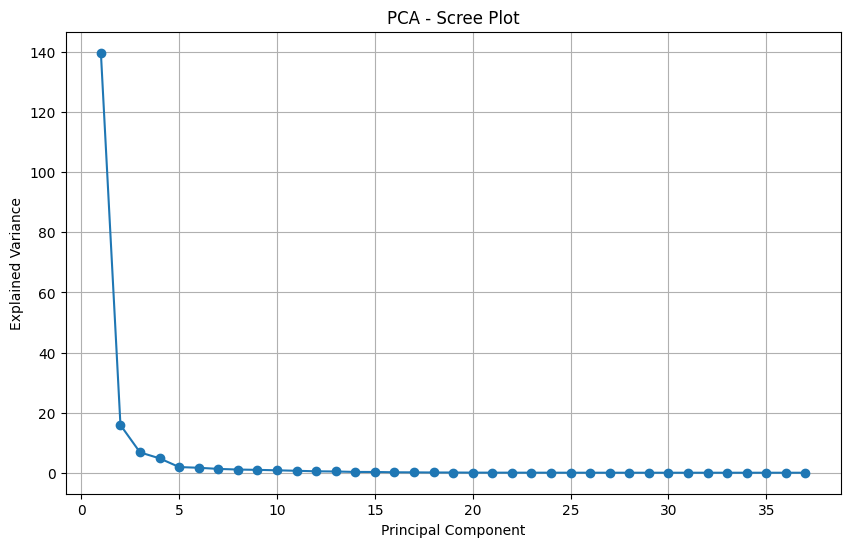

In [44]:
# ===============================
# Scree plot
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('PCA - Scree Plot')
plt.grid(True)
plt.show()

In [45]:
# ===============================
# Some hyperparameters for model training 
# ===============================
SEQ_LEN = 60           # input window (days)
PRED_HORIZON = 1       # predict 1 step ahead (next day), for multi-step, see recursive forecast
BATCH_SIZE = 64
EPOCHS = 10
VAL_SIZE = 0.1         # fraction for validation (time split used below)
TEST_SIZE = 0.1        # fraction for test (time split used below)

In [46]:
# ===============================
# Define features and targets
# ===============================
# Required inputs (assumptions)
FEATURE_COLS = ['Low', 'Upper_Band', 'Open', 'High', 'SMA_50', 'Typical_Price', 'OBV', 'EMA_20', 'SMA_200']  # taken from the XGB results not to have too much of them
FEATURE_COLS = ['High', 'Low', 'Open', 'Close', 'Volume', 'SMA_50', 'SMA_200', 'EMA_20',
       'EMA_50', 'Daily_Return', 'Log_Return', 'Momentum_4', 'Momentum_10',
       'RSI_14', 'Stochastic_K', 'Stochastic_D', 'Volatility_10',
       'Volatility_20', 'ATR_14', 'Price_Range', 'MACD', 'MACD_Signal',
       'Middle_Band', 'Upper_Band', 'Lower_Band', 'BB_%B', 'Typical_Price',
       'Candle_Body', 'Upper_Shadow', 'Lower_Shadow', 'Gap', 'HL_Ratio',
       'CO_Ratio', 'Volume_SMA_20', 'Volume_SMA_50', 'Volume_Change', 'OBV',
       'VWAP']
TARGET_COL = "Close"  # the model will predict this (1-step ahead)

In [47]:
# ===============================
# Build sequences
# ===============================
def build_sequences(df, feature_cols, target_col, seq_len=SEQ_LEN, pred_horizon=1):
    """
    Build X, y arrays for supervised learning.
    X shape: (N_samples, seq_len, n_features)
    y shape: (N_samples, pred_horizon)  # pred_horizon=1 gives (N,1)
    """
    data = df[feature_cols].to_numpy()
    target = df[target_col].to_numpy()

    N = len(df)
    X, y = [], []
    last_start = N - seq_len - pred_horizon + 1
    if last_start <= 0:
        raise ValueError("Not enough rows to build sequences. Reduce seq_len or pred_horizo")
    for i in range(last_start):
        X.append(data[i:i+seq_len])
        y.append(target[i+seq_len : i+seq_len+pred_horizon])
    X = np.array(X)
    y = np.array(y)
    # If pred_horizon==1, allow shape (N,) or (N,1) depending on downstream code. We'll keep (N, pred_horizon)
    return X, y

# Build sequences
X, y = build_sequences(df_ml, FEATURE_COLS, TARGET_COL, seq_len=SEQ_LEN, pred_horizon=PRED_HORIZON)
print("X.shape, y.shape =", X.shape, y.shape)

X.shape, y.shape = (6249, 60, 38) (6249, 1)


In [ ]:
# ===============================
# Train/validation (time-ordered)
# ===============================
# Keep time ordering: first 80% train, 10% validation, last 10% test
n_samples = X.shape[0]
train_end = int((1 - VAL_SIZE - TEST_SIZE) * n_samples)
val_end = int((1 - TEST_SIZE) * n_samples)

X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]

print("Train samples:", X_train.shape, "Val samples:", X_val.shape[0], "Test samples:", X_test.shape[0])

Train samples: 4999 Val samples: 625 Test samples: 625


In [49]:
# ===============================
# Model definition (stacked LSTM)
# ===============================
def build_lstm_model(seq_len, n_features, d_model=64, dropout=0.1):
    inp = layers.Input(shape=(seq_len, n_features))
    x = layers.LSTM(d_model, return_sequences=True, recurrent_dropout=dropout)(inp)
    x = layers.LSTM(d_model//2, return_sequences=False,  recurrent_dropout=dropout)(x)
    x = layers.Dense(d_model//2, activation="relu")(x)
    out = layers.Dense(PRED_HORIZON, activation="linear")(x)  # predict scaled Close
    model = models.Model(inp, out)
    return model

n_features = X.shape[2]
model1 = build_lstm_model(SEQ_LEN, n_features, d_model=64, dropout=0.1)
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 38)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 64)         │        26,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,873 (155.75 KB)

 Trainable params: 39,873 (155.75 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# ===============================
# Model definition (stacked LSTM)
# ===============================
def build_stack_lstm_model(seq_len, n_features, d_model=64, dropout=0.1):
    inp = layers.Input(shape=(seq_len, n_features))

    # First block
    x = layers.LSTM(d_model, return_sequences=True)(inp)
    x = layers.LayerNormalization()(x)
    x = layers.Dropout(dropout)(x)

    # Second block
    x = layers.LSTM(d_model, return_sequences=True)(x)
    x = layers.LayerNormalization()(x)
    x = layers.Dropout(dropout)(x)

    # Temporal Attention
    attn = layers.Attention()([x, x])
    x = layers.GlobalAveragePooling1D()(attn)

    # Dense head
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(64, activation="relu")(x)

    out = layers.Dense(PRED_HORIZON, activation="linear")(x)

    model = models.Model(inp, out)
    return model

n_features = X.shape[2]
model2 = build_stack_lstm_model(SEQ_LEN, n_features, d_model=64, dropout=0.1)
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 60, 38)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 60, 64)    │     26,368 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 60, 64)    │        128 │ lstm_2[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 60, 64)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 60, 64)    │     33,024 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 64)    │        128 │ lstm_3[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 60, 64)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 60, 64)    │          0 │ dropout_1[0][0],  │
│ (Attention)         │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ attention[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │      8,320 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         65 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 76,289 (298.00 KB)

 Trainable params: 76,289 (298.00 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# ===============================
# Model definition (Residual BiLSTM + Attention)
# ===============================
def build_residual_bilstm(seq_len, n_features, d_model=128, dropout=0.25):
    inp = layers.Input(shape=(seq_len, n_features))

    x1 = layers.Bidirectional(layers.LSTM(d_model, return_sequences=True))(inp)
    x1 = layers.LayerNormalization()(x1)

    x2 = layers.Bidirectional(layers.LSTM(d_model, return_sequences=True))(x1)
    x2 = layers.LayerNormalization()(x2)

    # Residual
    x = layers.Add()([x1, x2])
    x = layers.Dropout(dropout)(x)

    # Attention
    attn = layers.Attention()([x, x])
    x = layers.GlobalMaxPooling1D()(attn)

    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dense(64, activation="relu")(x)

    out = layers.Dense(PRED_HORIZON)(x)
    return models.Model(inp, out)

n_features = X.shape[2]
model3 = build_residual_bilstm(SEQ_LEN, n_features, d_model=128, dropout=0.25)
model3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 60, 38)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 60, 256)   │    171,008 │ input_layer_2[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 256)   │        512 │ bidirectional[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 60, 256)   │    394,240 │ layer_normalizat… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 256)   │        512 │ bidirectional_1[… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 60, 256)   │          0 │ layer_normalizat… │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 60, 256)   │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 60, 256)   │          0 │ dropout_3[0][0],  │
│ (Attention)         │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ attention_1[0][0] │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     32,896 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      8,256 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         65 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 607,489 (2.32 MB)

 Trainable params: 607,489 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# ===============================
# Define the chosen model
# ===============================
model = model3

In [ ]:
# ===============================
# Loss, optimizer, metrics and callbacks
# ===============================
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))
opt = optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)
model.compile(optimizer=opt, loss="mse", metrics=["mae", rmse])
earlystop_cb = callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_cb = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-6, verbose=1)

In [54]:
# ===============================
# Training
# ===============================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=False,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_cb]
)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 17.3751 - mae: 2.9340 - rmse: 3.0524
Epoch 1: val_loss improved from None to 3.54792, saving model to best_lstm_model.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 228ms/step - loss: 6.7734 - mae: 1.7142 - rmse: 1.8289 - val_loss: 3.5479 - val_mae: 1.8143 - val_rmse: 1.8645 - learning_rate: 0.0010
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 5.7323 - mae: 2.0078 - rmse: 2.0891
Epoch 2: val_loss improved from 3.54792 to 0.29141, saving model to best_lstm_model.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 305ms/step - loss: 4.7581 - mae: 1.8386 - rmse: 1.9139 - val_loss: 0.2914 - val_mae: 0.4522 - val_rmse: 0.5272 - learning_rate: 0.0010
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 1.7692 - mae: 0.9128 - rmse: 0.9752
Epoch 3: val_loss did not improve from 0.29141
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 304ms/step - loss: 4.7608 - mae: 1.3991 - rmse: 1.4645 - val_loss: 1.8230 - val_mae: 1.2725 - val_rmse: 1.3333 - learning_ra

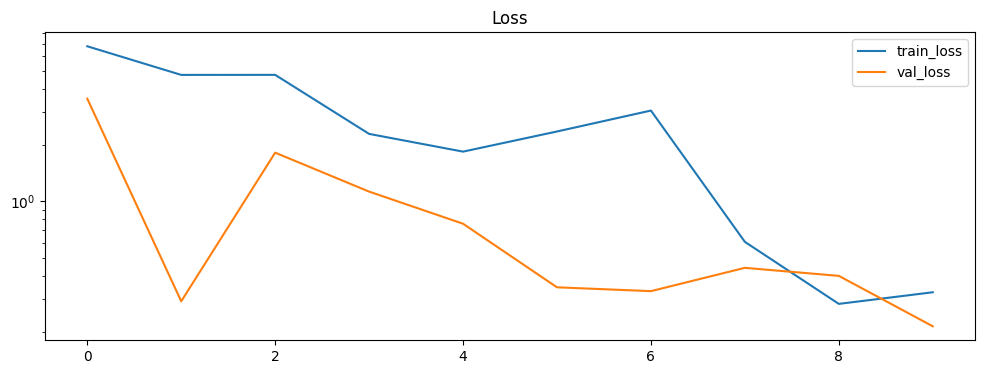

In [55]:
# ===============================
# Plot training loss & metrics
# ===============================
plt.figure(figsize=(12,4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.yscale("log")
plt.legend(); plt.title("Loss"); plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


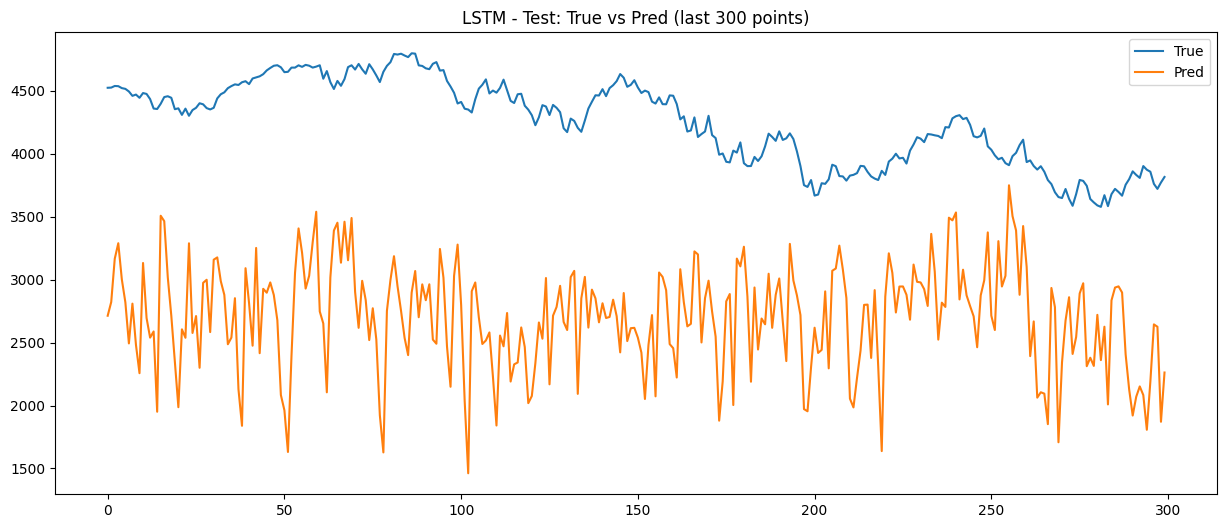

Test metrics (original units): {'MAE': 1361.629230463025, 'MSE': 2233218.7726026457, 'RMSE': 1494.3957884719314}


In [65]:
# ===============================
# Evaluate / Predictions (test)
# ===============================
# Predict (scaled)
y_test_pred_scaled = model.predict(X_test)  # shape (N_test, PRED_HORIZON)

# If you scaled the target 'Close' separately
try:
    y_test_pred = close_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
    y_test_true = close_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
except NameError:
    print("No target scaler found, keeping scaled values")
    y_test_pred = y_test_pred_scaled.flatten()
    y_test_true = y_test.flatten()

# Plot last N points
Nplot = min(300, len(y_test_true))
plt.figure(figsize=(15,6))
plt.plot(y_test_true[-Nplot:], label="True")
plt.plot(y_test_pred[-Nplot:], label="Pred")
plt.legend()
plt.title(f"LSTM - Test: True vs Pred (last {Nplot} points)")
plt.show()

# Compute metrics
def compute_metrics(true, pred):
    true = np.array(true).reshape(-1)
    pred = np.array(pred).reshape(-1)
    mae = np.mean(np.abs(true - pred))
    mse = np.mean((true - pred)**2)
    rmse_v = np.sqrt(mse)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse_v}

metrics_test = compute_metrics(y_test_true, y_test_pred)
print("Test metrics (original units):", metrics_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


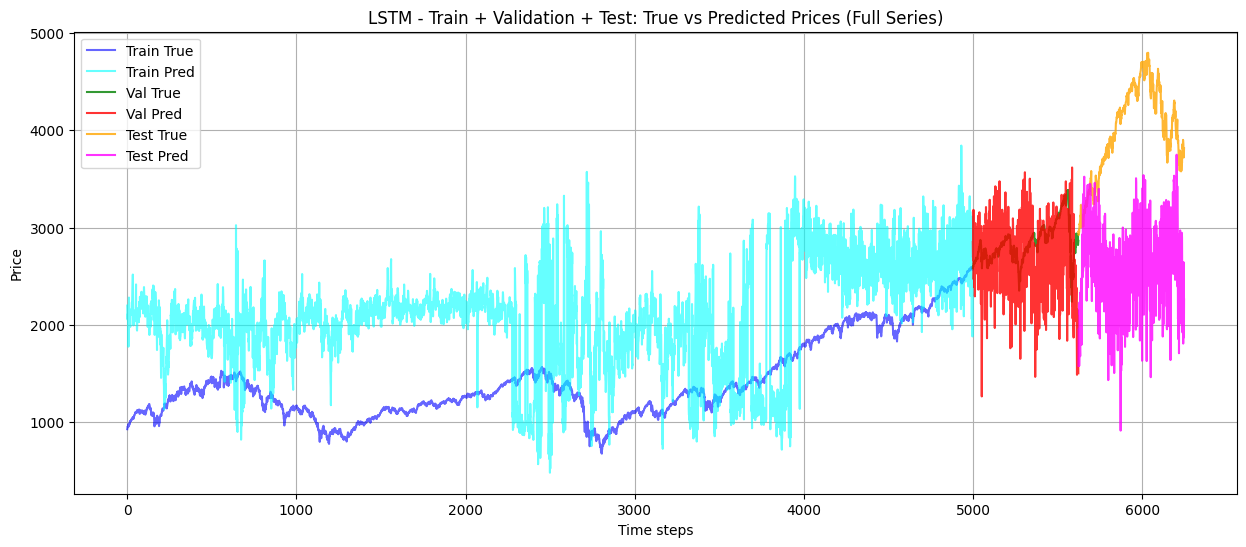

Training metrics (original units): {'MAE': 756.4853622971182, 'MSE': 703653.1574171917, 'RMSE': 838.8403646804269}
Validation metrics (original units): {'MAE': 357.4909420097375, 'MSE': 204829.5789275509, 'RMSE': 452.5810191861242}
Test metrics (original units): {'MAE': 1361.629230463025, 'MSE': 2233218.7726026457, 'RMSE': 1494.3957884719314}


In [66]:
# ===============================
# Full series plot - Train + Validation + Test
# ===============================

# Predict scaled values for train, validation, test
y_train_pred_scaled = model.predict(X_train)
y_val_pred_scaled = model.predict(X_val)
y_test_pred_scaled = model.predict(X_test)

# Inverse transform using the target scaler
try:
    y_train_pred = close_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
    y_train_true = close_scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

    y_val_pred = close_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).flatten()
    y_val_true = close_scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

    y_test_pred = close_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
    y_test_true = close_scaler.inverse_transform(y_test.reshape(-1, 1))
except NameError:
    print("No target scaler found, keeping scaled values")
    y_train_pred = y_train_pred_scaled.flatten()
    y_train_true = y_train.flatten()
    y_val_pred = y_val_pred_scaled.flatten()
    y_val_true = y_val.flatten()
    y_test_pred = y_test_pred_scaled.flatten()
    y_test_true = y_test.flatten()

# Plot the full series
plt.figure(figsize=(15,6))
plt.plot(y_train_true, label="Train True", color='blue', alpha=0.6)
plt.plot(y_train_pred, label="Train Pred", color='cyan', alpha=0.6)
plt.plot(range(len(y_train_true), len(y_train_true)+len(y_val_true)), y_val_true, label="Val True", color='green', alpha=0.8)
plt.plot(range(len(y_train_true), len(y_train_true)+len(y_val_true)), y_val_pred, label="Val Pred", color='red', alpha=0.8)
plt.plot(range(len(y_train_true)+len(y_val_true), len(y_train_true)+len(y_val_true)+len(y_test_true)), y_test_true, label="Test True", color='orange', alpha=0.8)
plt.plot(range(len(y_train_true)+len(y_val_true), len(y_train_true)+len(y_val_true)+len(y_test_true)), y_test_pred, label="Test Pred", color='magenta', alpha=0.8)
plt.xlabel("Time steps")
plt.ylabel("Price")
plt.title("LSTM - Train + Validation + Test: True vs Predicted Prices (Full Series)")
plt.legend()
plt.grid(True)
plt.show()

# Compute metrics
def compute_metrics(true, pred):
    true = np.array(true).reshape(-1)
    pred = np.array(pred).reshape(-1)
    mae = np.mean(np.abs(true - pred))
    mse = np.mean((true - pred)**2)
    rmse_v = np.sqrt(mse)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse_v}

metrics_train = compute_metrics(y_train_true, y_train_pred)
metrics_val = compute_metrics(y_val_true, y_val_pred)
metrics_test = compute_metrics(y_test_true, y_test_pred)

print("Training metrics (original units):", metrics_train)
print("Validation metrics (original units):", metrics_val)
print("Test metrics (original units):", metrics_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 

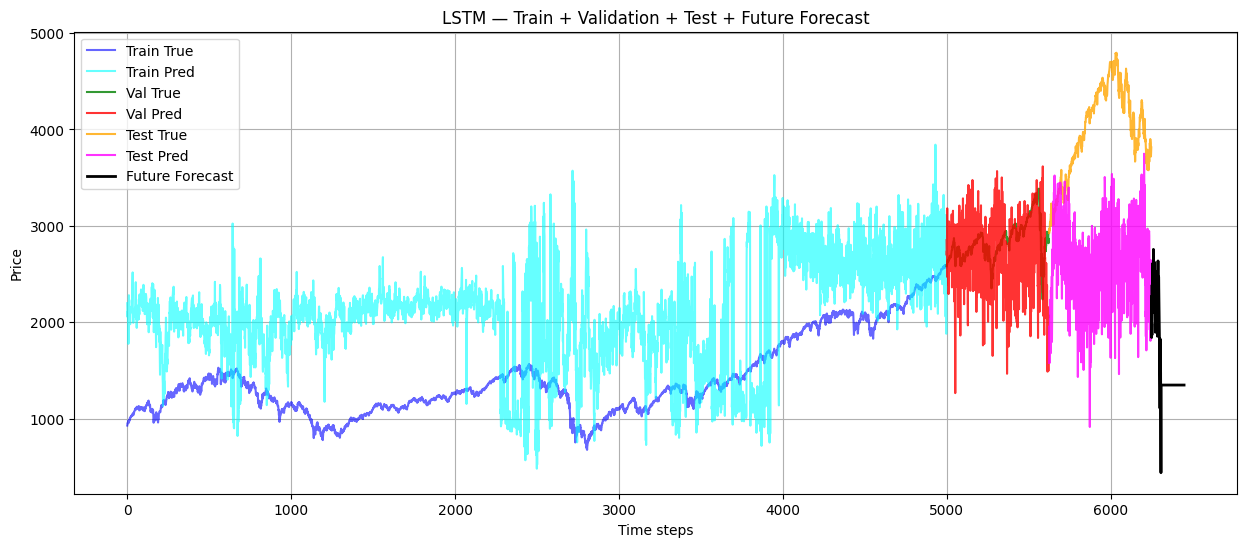

In [67]:
# ===============================
# Recursive multi-step forecast (future)
# ===============================
def recursive_forecast(model, last_sequence, n_steps=20, close_scaler=None):
    """
    last_sequence: (seq_len, n_features) scaled
    returns: future predictions (original units if scaler provided)
    """
    seq = last_sequence.copy()
    preds_scaled = []

    for _ in range(n_steps):
        x = seq[np.newaxis, ...]           # (1, seq_len, n_features)
        p = model.predict(x)[0, 0]
        preds_scaled.append(p)

        # Roll window forward (features frozen)
        next_row = seq[-1].copy()
        seq = np.vstack([seq[1:], next_row])

    preds_scaled = np.array(preds_scaled).reshape(-1, 1)

    if close_scaler is not None:
        return close_scaler.inverse_transform(preds_scaled).flatten()

    return preds_scaled.flatten()

# Predict Train / Validation
y_train_pred_scaled = model.predict(X_train)
y_val_pred_scaled   = model.predict(X_val)
y_test_pred_scaled  = model.predict(X_test)

# Inverse scaling
y_train_pred = close_scaler.inverse_transform(y_train_pred_scaled).flatten()
y_train_true = close_scaler.inverse_transform(y_train.reshape(-1,1)).flatten()

y_val_pred = close_scaler.inverse_transform(y_val_pred_scaled).flatten()
y_val_true = close_scaler.inverse_transform(y_val.reshape(-1,1)).flatten()

y_test_pred = close_scaler.inverse_transform(y_test_pred_scaled).flatten()
y_test_true = close_scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

# Future forecast
N_FUTURE = 200
last_seq = X_test[-1]  # last available sequence from test set

future_preds = recursive_forecast(model, last_seq, n_steps=N_FUTURE, close_scaler=close_scaler)

plt.figure(figsize=(15,6))

# Train
plt.plot(range(len(y_train_true)), y_train_true, label="Train True", color="blue", alpha=0.6)
plt.plot(range(len(y_train_pred)), y_train_pred, label="Train Pred", color="cyan", alpha=0.6)

# Validation
val_x = range(len(y_train_true), len(y_train_true) + len(y_val_true))
plt.plot(val_x, y_val_true, label="Val True", color="green", alpha=0.8)
plt.plot(val_x, y_val_pred, label="Val Pred", color="red", alpha=0.8)

# Test
test_x = range(len(y_train_true) + len(y_val_true), len(y_train_true) + len(y_val_true) + len(y_test_true))
plt.plot(test_x, y_test_true, label="Test True", color="orange", alpha=0.8)
plt.plot(test_x, y_test_pred, label="Test Pred", color="magenta", alpha=0.8)

# Future forecast
future_x = range(len(y_train_true) + len(y_val_true) + len(y_test_true), len(y_train_true) + len(y_val_true) + len(y_test_true) + N_FUTURE)
plt.plot(future_x, future_preds, label="Future Forecast", color="black", linewidth=2)

plt.xlabel("Time steps")
plt.ylabel("Price")
plt.title("LSTM — Train + Validation + Test + Future Forecast")
plt.legend()
plt.grid(True)
plt.show()